# <font color=green><center>**Phase 3**</center></font>

***

# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from scipy.stats import norm,skew
from sklearn import preprocessing  
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading Dataset

Loading the Dataset which we have preprocessed already in the last phase.

In [2]:
train_data=pd.read_csv("preprocessed_train_df.csv")
test_data=pd.read_csv("preprocessed_test_df.csv")


In [3]:
#Original test dataset is loaded to obtain the id 
test=pd.read_csv("test.csv")

# Dataset Overview

In [4]:
# No. of records and dimensions respectively
train_data.shape, test_data.shape

((134, 44), (100000, 43))

In [5]:
train_data.head()

,Unnamed: 0,Month,Year,Years_old,City Group,Type,P1,P2,P3,P4,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue_log
0,0,7,1999,16,0,2,4,5.0,4.0,4.0,...,3.0,5,3,4,5,5,4,3,4,15.547830
1,1,2,2008,7,0,1,4,5.0,4.0,4.0,...,3.0,0,0,0,0,0,0,0,0,15.750379
2,2,3,2013,2,1,2,2,4.0,2.0,5.0,...,3.0,0,0,0,0,0,0,0,0,14.535971
3,3,2,2012,3,1,2,6,4.5,6.0,6.0,...,7.5,25,12,10,6,18,12,12,6,14.799651
4,4,5,2009,6,1,2,3,4.0,3.0,4.0,...,3.0,5,1,3,2,3,4,3,3,15.278005


# Dropping the index column 

In [6]:
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
#Splitting the train dataset as inputs and targets
x_train=train_data.drop(['revenue_log'],axis=1)#input variables
y_train=train_data['revenue_log']#target variables


In [9]:
x_test=test_data.copy()

In [76]:
x_train.head(2)

,Month,Year,Years_old,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,7,1999,16,0,2,4,5.0,4.0,4.0,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,2,2008,7,0,1,4,5.0,4.0,4.0,1,...,3.0,3.0,0,0,0,0,0,0,0,0


In [11]:
y_train.head()

0    15.547830
1    15.750379
2    14.535971
3    14.799651
4    15.278005
Name: revenue_log, dtype: float64

In [77]:
x_test.head(2)

,Month,Year,Years_old,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,2011,4,1,1,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,3,2011,4,1,2,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0


In [78]:
print("Train Data -- inputs: ",x_train.shape,"Targets : ",y_train.shape)
print("Test Data -- ",x_test.shape)

Train Data -- inputs:  (134, 42) Targets :  (134,)
Test Data --  (100000, 42)


# Standardization

In [14]:
# Standardising the independent variables
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

In [15]:
x_train_scaled.shape

(134, 42)

In [16]:
x_test_scaled.shape

(100000, 42)

# Dimensionality Reduction using PCA

In [17]:
pca=PCA(n_components=20)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca_=pca.transform(x_test_scaled)


In [18]:
x_train_pca.shape

(134, 20)

In [20]:
x_test_pca_.shape

(100000, 20)

The no. of dimensions has reduced to 20 after applying PCA with no. of components as 20.

Let's check the explained variance and it's ratio .

In [21]:
variance=pca.explained_variance_

In [22]:
variance

array([21.00870027,  6.73862827,  2.72556422,  1.78610166,  1.5247974 ,
        1.31668701,  1.04603402,  0.75504368,  0.60587246,  0.53216826,
        0.48962287,  0.43204138,  0.35762645,  0.32277324,  0.30847824,
        0.28376667,  0.2592096 ,  0.22979194,  0.17588765,  0.17326338])

In [23]:
variance_ratio=pca.explained_variance_ratio_


In [24]:
variance_ratio

array([0.49647426, 0.15924619, 0.0644101 , 0.04220887, 0.03603377,
       0.03111574, 0.02471971, 0.01784307, 0.01431788, 0.01257612,
       0.01157069, 0.01020993, 0.00845137, 0.00762773, 0.00728991,
       0.00670593, 0.0061256 , 0.00543041, 0.00415655, 0.00409453])

# Modelling

Displaying the shape of data for info

In [30]:
print(x_train.shape,x_test.shape)

(134, 42) (100000, 42)


In [31]:
print(y_train.shape)

(134,)


In [32]:
print(x_train_scaled.shape,x_test_scaled.shape)

(134, 42) (100000, 42)


In [33]:
print(x_train_pca.shape,x_test_pca_.shape)

(134, 20) (100000, 20)


In [34]:
y_train

0      15.547830
1      15.750379
2      14.535971
3      14.799651
4      15.278005
         ...    
129    15.571227
130    16.041512
131    14.749585
132    15.792038
133    15.666048
Name: revenue_log, Length: 134, dtype: float64

In [35]:
#Converting back to original revenue since we have to use these values in Kaggle for generating the rmse score of our model on test data.
y_train=np.exp(y_train)

In [36]:
y_train

0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
129    5787594.0
130    9262754.0
131    2544857.0
132    7217634.0
133    6363241.0
Name: revenue_log, Length: 134, dtype: float64

In [37]:
#Defining the predict_model function to return the rmse value on train data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def predict_model(model,x_train,y_actual):
    y_pred = model.predict(x_train)
    rms = mean_squared_error(y_actual,y_pred,squared=False)   #squared=False for RMSE
    r2score=r2_score(y_pred,y_actual)
    print("r2 score: " ,r2score)
    print("rms : ",rms)
    return rms

In [38]:
# Defining testDataPrediction function for generating a dataframe based on the conventions mentioned in Kaggle for testing.
def testDataPrediction(model,x_test):
    y_test = model.predict(x_test)
    dataFrame = pd.DataFrame({'Id': test['Id'], 'Prediction': y_test}) 
    return dataFrame

## Linear Regression

##### Standard Scaler

In [39]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

modelLR=LinearRegression()
modelLR.fit(x_train_scaled,y_train)
rms_LR_=predict_model(modelLR,x_train_scaled,y_train)
rms_LR_


r2 score:  -0.6961617409519361
rms :  1422030.81811235


1422030.81811235

In [40]:
predictions_LR = testDataPrediction(modelLR,x_test_scaled)
predictions_LR.to_csv('./LinearRegressionModel.csv', index = False)

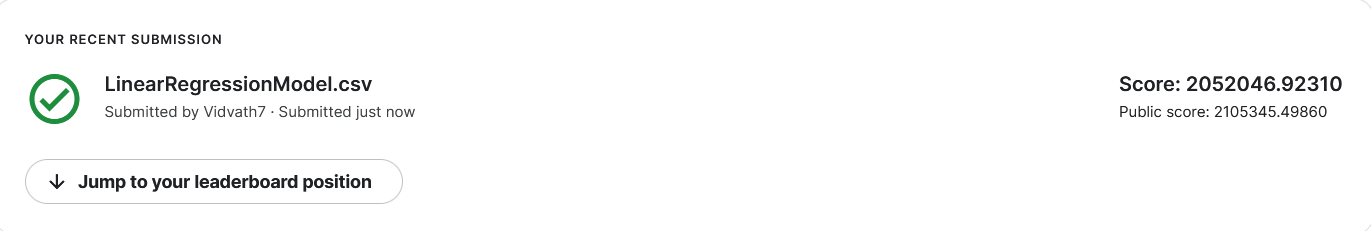

##### PCA

In [42]:
#Applying PCA for dimensionality reduction
modelLR2=LinearRegression()
modelLR2.fit(x_train_pca,y_train)
rms_LR_pca=predict_model(modelLR2,x_train_pca,y_train)
rms_LR_pca


r2 score:  -3.2813007843735917
rms :  1614231.3104591107


1614231.3104591107

In [43]:
predictions_LR = testDataPrediction(modelLR2,x_test_pca_)
predictions_LR.to_csv('./LinearRegressionModelPCA.csv', index = False)

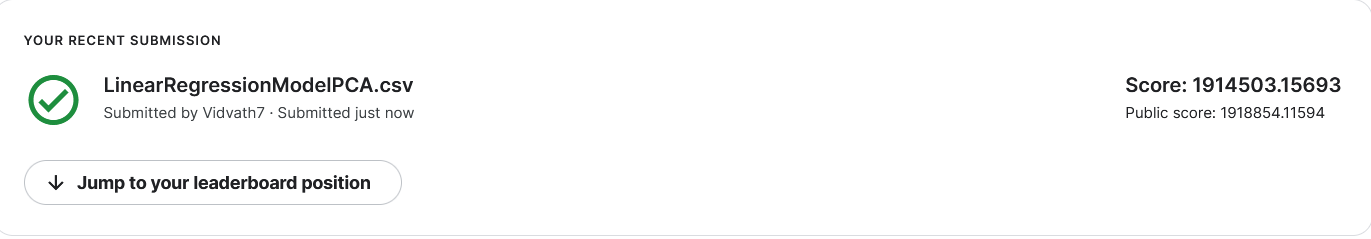

## KNN

##### Standard Scaler

In [44]:
from sklearn.neighbors import KNeighborsRegressor
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

knn_parameters={'n_neighbors':[3,5,7,9,11,13,15]}

knn=KNeighborsRegressor()
modelKNN=GridSearchCV(knn,knn_parameters,cv=5,n_jobs=-1) #Number of jobs to run in parallel,-1 means using all processors.
modelKNN.fit(x_train_scaled,y_train)

print(f'No. of optimal neighbors: {modelKNN.best_params_["n_neighbors"]}')
print(f'Best score: {modelKNN.best_score_}')

No. of optimal neighbors: 11
Best score: -0.013078765899068135


In [45]:
rms_knn=predict_model(modelKNN,x_train_scaled,y_train)
rms_knn

r2 score:  -3.4345587016709445
rms :  1564502.330981812


1564502.330981812

In [46]:
predictions_knn = testDataPrediction(modelKNN,x_test_scaled)
predictions_knn.to_csv('./KNeighborsRegressorModel.csv', index = False)

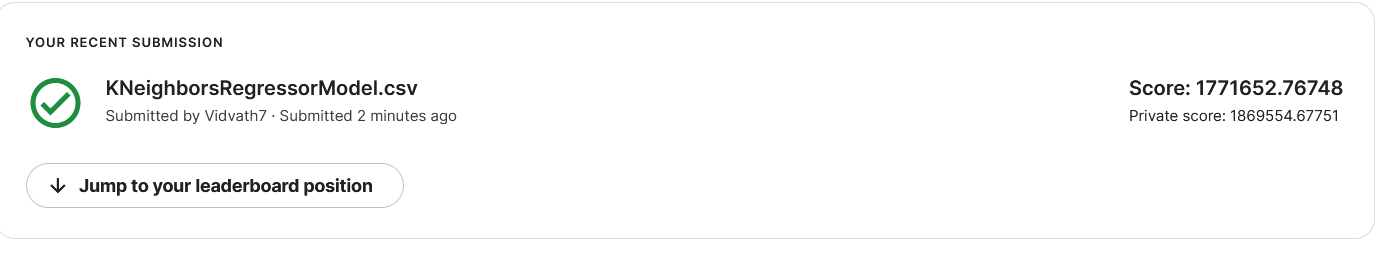

##### PCA

In [47]:
knn_parameters={'n_neighbors':[3,5,7,9,11,13,15]} #no. of nearest neighbours to be considered

knn_2=KNeighborsRegressor()
modelKnn2=GridSearchCV(knn_2,knn_parameters,cv=5,n_jobs=-1) #Number of jobs to run in parallel,-1 means using all processors.
modelKnn2.fit(x_train_pca,y_train)

print(f'No. of optimal neighbors: {modelKnn2.best_params_["n_neighbors"]}')
print(f'Best score: {modelKnn2.best_score_}')

No. of optimal neighbors: 9
Best score: -0.0377535647049684


In [48]:
rms_knn2=predict_model(modelKnn2,x_train_pca,y_train)
rms_knn2

r2 score:  -2.5121073196863475
rms :  1542528.5116596185


1542528.5116596185

In [49]:
predictions_knn2 = testDataPrediction(modelKnn2,x_test_pca_)
predictions_knn2.to_csv('./KNeighborsRegressorModelPCA.csv', index = False)

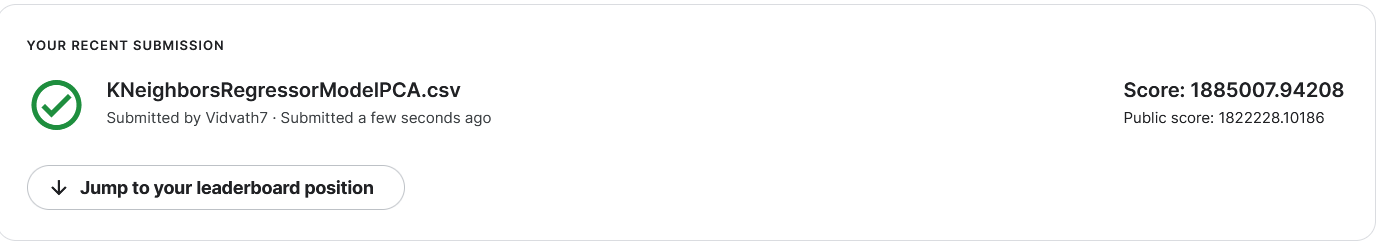

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf_parameters = {
    'max_depth': [10, 30, 35, 50, 65, 75, 100], #The maximum depth of the tree.
    'min_samples_leaf': [1,2,3, 4, 5], # The minimum number of samples required to be at a leaf node. 
    'min_samples_split': [2,4,6,8, 10,12], #The minimum number of samples required to split an internal node
    'n_estimators': [10,30, 50,75,100,200] #The number of trees in the forest.
}

rf=RandomForestRegressor()
#Why use scoring='neg_root_mean_squared_error' ? --> https://stackoverflow.com/questions/62125674/why-is-negative-mse-or-mas-scoring-parameter-like-neg-mean-absolute-error-in/#answer-62131957
#An objective function that the scorer can maximize is just by "convention" as the Sklearn documentation suggests.
modelRF=GridSearchCV(rf,rf_parameters,n_jobs=-1,scoring='neg_root_mean_squared_error',cv=5) 
modelRF.fit(x_train_scaled,y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 35, 50, 65, 75, 100],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [10, 30, 50, 75, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [51]:
print("Optimal depth: ",modelRF.best_params_["max_depth"])
print("Optimal min_sample_leaf: ",modelRF.best_params_["min_samples_leaf"])
print("Optimal min_samples_split: ",modelRF.best_params_["min_samples_split"])
print("Optimal n_estimators: ",modelRF.best_params_["n_estimators"])
print("Best score: ",modelRF.best_score_)

Optimal depth:  10
Optimal min_sample_leaf:  2
Optimal min_samples_split:  2
Optimal n_estimators:  10
Best score:  -1712640.9886868508


In [52]:
rms_rf=predict_model(modelRF,x_train_scaled,y_train)
rms_rf

r2 score:  0.43162035132491006
rms :  911051.6808180441


911051.6808180441

In [53]:
predictions_rf = testDataPrediction(modelRF,x_test_scaled)
predictions_rf.to_csv('./RandomForestRegressorModel.csv', index = False)

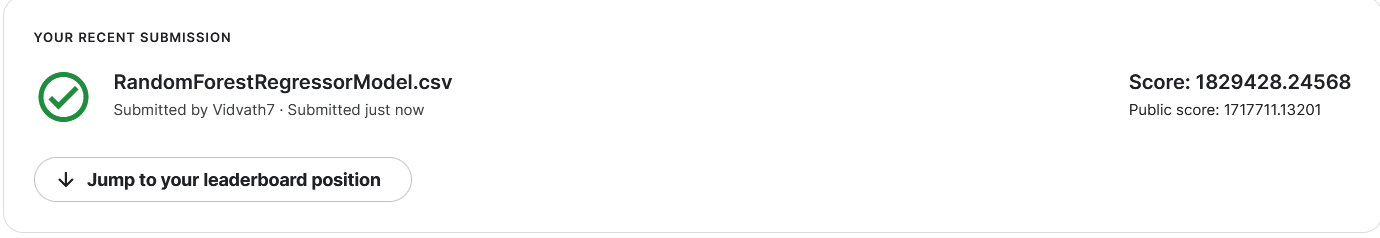

## Gradient Boosting Regressor

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_parameters={
    'learning_rate':[0.01,0.05,0.1,0.5,0.75,1],
    'n_estimators':[20,50,75,100,150,200,400], # The number of boosting stages to perform. 
    'max_depth': [2,4,8,10, 30, 35, 50, 65, 75, 100]   
}

gbr=GradientBoostingRegressor()
modelGBR=GridSearchCV(gbr,gbr_parameters,n_jobs=-1,scoring='neg_root_mean_squared_error',cv=10)
modelGBR.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 0.75, 1],
                         'max_depth': [2, 4, 8, 10, 30, 35, 50, 65, 75, 100],
                         'n_estimators': [20, 50, 75, 100, 150, 200, 400]},
             scoring='neg_root_mean_squared_error')

In [55]:
print("Optimal depth: ",modelGBR.best_params_["max_depth"])
print("Optimal Learning rate: ",modelGBR.best_params_["learning_rate"])
print("Optimal n_estimators: ",modelGBR.best_params_["n_estimators"])
print("Best score: ",modelGBR.best_score_)

Optimal depth:  8
Optimal Learning rate:  0.01
Optimal n_estimators:  100
Best score:  -1661974.6809895881


In [56]:
rms_gbr=predict_model(modelGBR,x_train_scaled,y_train)
rms_gbr

r2 score:  0.5025648342375162
rms :  760510.8783433627


760510.8783433627

In [57]:
predictions_gbr = testDataPrediction(modelGBR,x_test_scaled)
predictions_gbr.to_csv('./GradientBoostingRegressorModel.csv', index = False)

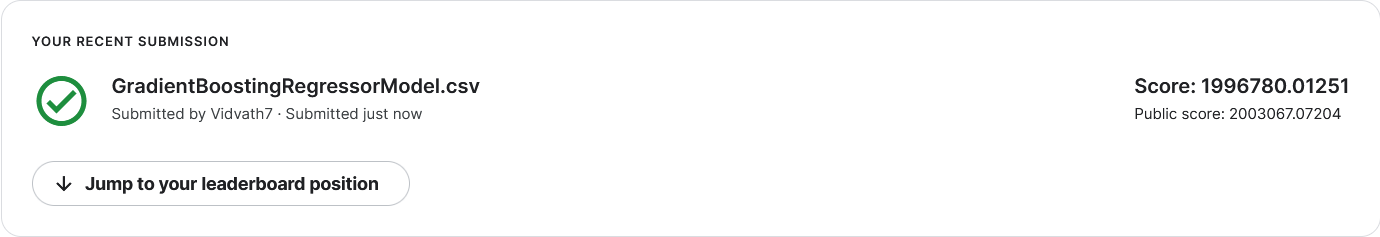

## XGBoost

In [59]:
from xgboost import XGBRegressor

xgb_parameters={ 'learning_rate': [0.1,0.5,0.75,0.9,0.99, 1], #Boosting learning rate (xgb’s “eta”)
                'n_estimators': [20,50,100,200], #Number of boosted trees to fit.
                'reg_alpha': [0.0001,0.001,0.01,0.1,0.5,1], #L1 regularization term on weights
                'reg_lambda': [0.0001,0.001,0.01,0.1,0.5,1], # L2 regularization term on weights
                'gamma':[0,50] # Minimum loss reduction required to make a further partition
                                           #on a leaf node of the tree.
               }

xgb=XGBRegressor()
modelXGB=GridSearchCV(xgb,xgb_parameters,n_jobs=-1,cv=10,scoring='neg_root_mean_squared_error')
modelXGB.fit(x_train_scaled,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [60]:
print("Optimal Learning rate: ",modelXGB.best_params_["learning_rate"])
print("Optimal alpha: ",modelXGB.best_params_["reg_alpha"])
print("Optimal lambda: ",modelXGB.best_params_["reg_lambda"])
print("Optimal n_estimators: ",modelXGB.best_params_["n_estimators"])
print("Optimal gamma: ",modelXGB.best_params_["gamma"])
print("Best score: ",modelGBR.best_score_)


Optimal Learning rate:  0.1
Optimal alpha:  0.01
Optimal lambda:  0.1
Optimal n_estimators:  50
Optimal gamma:  0
Best score:  -1661974.6809895881


In [61]:
rms_xgb=predict_model(modelXGB,x_train_scaled,y_train)
rms_xgb

r2 score:  0.9900408912323851
rms :  167556.47961572572


167556.47961572572

In [62]:
predictions_xgb = testDataPrediction(modelXGB,x_test_scaled)
predictions_xgb.to_csv('./XGBRegressorModel.csv', index = False)

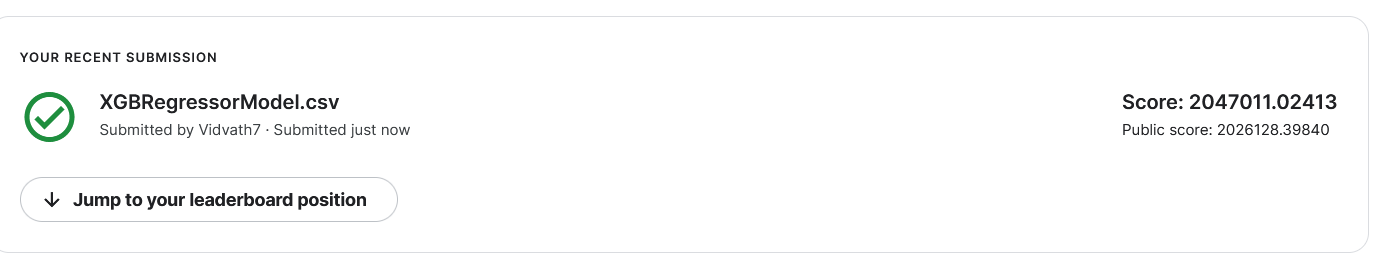

# Summary

In [66]:
from tabulate import tabulate 
dict = {'Models'     : ['Linear Regression - Standard scaler','Linear Regression - PCA','KNN Regressor- Standard scaler',
                        'KNN Regressor - PCA','Random Forest Regressor-GridSearchCV','Gradient Boosting Regressor -GridSearchCV ','XGBoost'],
        'Train RMSE' : [rms_LR_,rms_LR_pca,rms_knn,rms_knn2,rms_rf,rms_gbr,rms_xgb],
        'Test RMSE'  : ['2052046.92310','1914503.15693','1771652.76748','1885007.94208',
                        '1829428.24568','1996780.01251','2047011.02413']  
        }
df = pd.DataFrame(dict)
print(tabulate(df, headers = 'keys', tablefmt = 'psql')) 

+----+-------------------------------------------+------------------+-------------+
|    | Models                                    |       Train RMSE |   Test RMSE |
|----+-------------------------------------------+------------------+-------------|
|  0 | Linear Regression - Standard scaler       |      1.42203e+06 | 2.05205e+06 |
|  1 | Linear Regression - PCA                   |      1.61423e+06 | 1.9145e+06  |
|  2 | KNN Regressor- Standard scaler            |      1.5645e+06  | 1.77165e+06 |
|  3 | KNN Regressor - PCA                       |      1.54253e+06 | 1.88501e+06 |
|  4 | Random Forest Regressor-GridSearchCV      | 911052           | 1.82943e+06 |
|  5 | Gradient Boosting Regressor -GridSearchCV | 760511           | 1.99678e+06 |
|  6 | XGBoost                                   | 167556           | 2.04701e+06 |
+----+-------------------------------------------+------------------+-------------+


The model with the least TEST RMSE, i.e **KNN Regressor- Standard Scaler** values proves to be the best model among the ones that we have implemented. 

# Feature Importance

We have found that the KNN Regressor- Standard Scaler model performs the best . But Feature importance can't be drawn out from knn model since it's working is not based upon the feature weights. 

So we can use the second best model- Random Forest Regressor-GridSearchCV for plotting the feature imporatances 

In [74]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(18,12))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

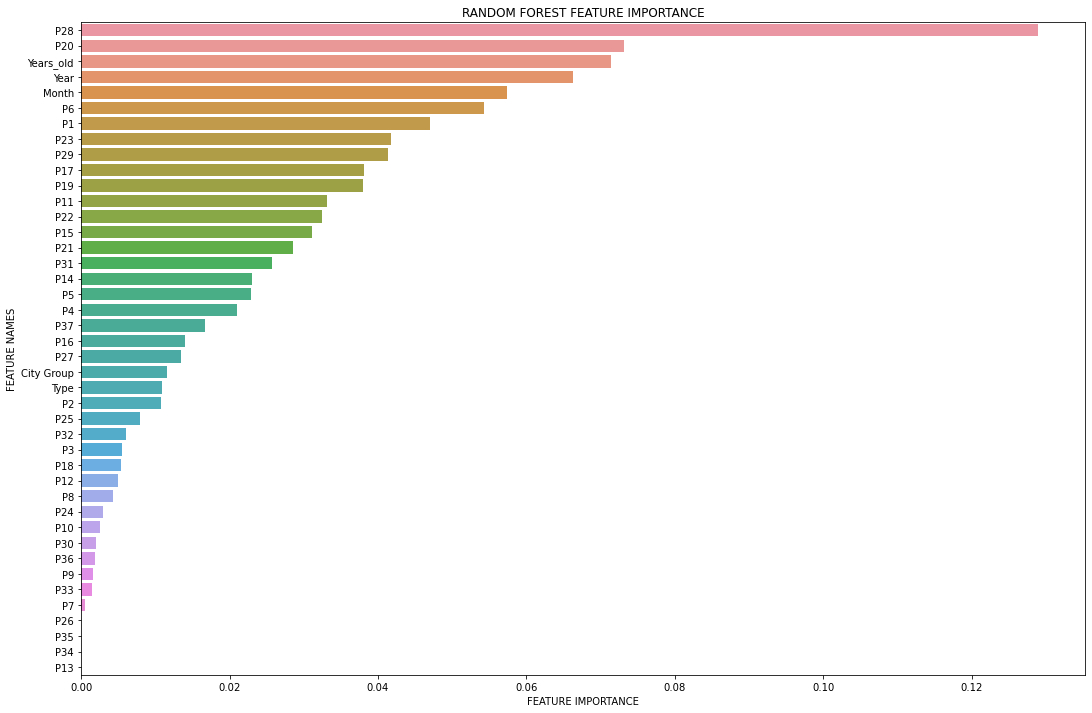

In [75]:
plot_feature_importance(modelRF.best_estimator_.feature_importances_,x_train.columns,'RANDOM FOREST')
